# Cement manufacturing - concrete strength prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv = pd.read_csv('concrete.csv')
df = pd.DataFrame(csv)

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

## Age check
It is important to check the ages of the tests, because the usual age for comparing strength is at 28-days at most cases.

In [6]:
df['age'].value_counts()

age
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

## Exploring the distribution of the strengths

<Axes: xlabel='strength', ylabel='Count'>

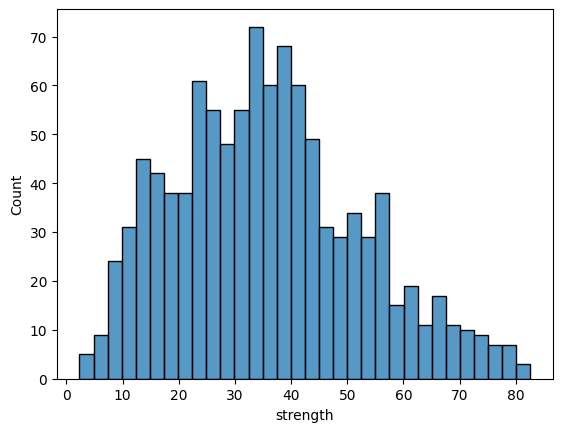

In [7]:
sns.histplot(data=df, x="strength", binwidth=2.5)

## Joining the binders
We need to see the 3 kind of binders combined as well to see the w/c ratio of the mixtures.

In [8]:
df["binder"] = df["cement"] + df["slag"] + df["ash"]

<Axes: xlabel='binder', ylabel='Count'>

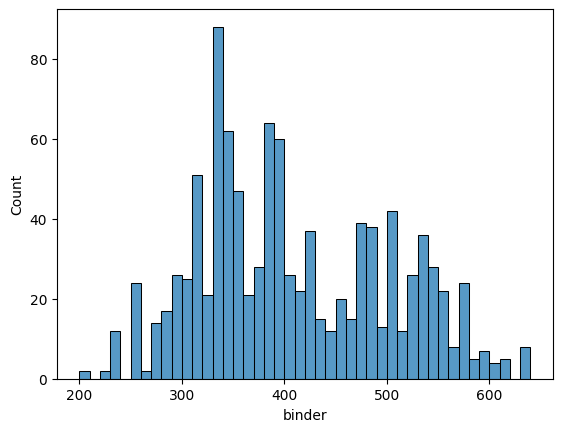

In [9]:
sns.histplot(data=df, x="binder", binwidth=10)

In [10]:
df["w/c"] = np.round((df["water"] + df["superplastic"]) / df["binder"], 3)

<Axes: xlabel='w/c', ylabel='Count'>

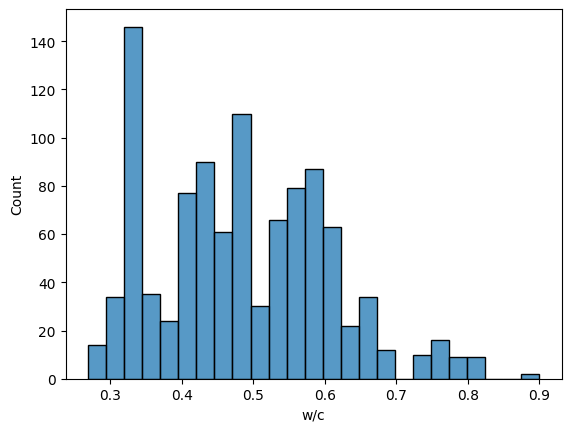

In [11]:
sns.histplot(data=df, x="w/c", binwidth=0.025)

## Filtering for results at 28-days
To see the present correlation between the w/c ratio and strength, we filter for the results only at 28-days.

In [12]:
df_28 = df[df["age"] == 28]
df_28.shape

(425, 11)

<Axes: xlabel='w/c', ylabel='strength'>

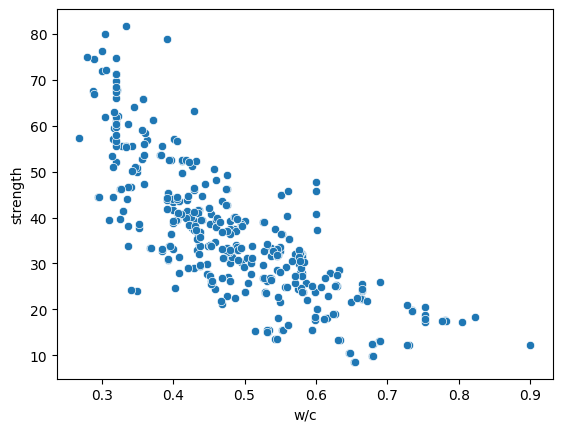

In [13]:
sns.scatterplot(data=df_28, x="w/c", y="strength")

## Examining the ratio of the aggregates

In [15]:
df["agg"] = df["coarseagg"] + df["fineagg"]
df["fineagg_ratio"] = np.round(df["fineagg"] / df["agg"], 3)
df["coarseagg_ratio"] = np.round(df["coarseagg"] / df["agg"], 3)

In [16]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,binder,w/c,agg,fineagg_ratio,coarseagg_ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.576,1720.3,0.435,0.565
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,335.4,0.504,1877.0,0.424,0.576
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,345.7,0.558,1818.1,0.474,0.526
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600,1602.0,0.418,0.582
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.598,1744.1,0.399,0.601


In [17]:
df_filtered = df[["age", "strength", "w/c", "binder", "agg", "fineagg_ratio"]]

In [18]:
df_filtered_28 = df_filtered[df_filtered["age"] == 28]
df_filtered_28.head()

,age,strength,w/c,binder,agg,fineagg_ratio
0,28,29.89,0.576,353.3,1720.3,0.435
2,28,29.22,0.558,345.7,1818.1,0.474
3,28,45.85,0.600,380.0,1602.0,0.418
4,28,18.29,0.598,338.2,1744.1,0.399
8,28,21.65,0.649,296.0,1850.0,0.414


In [19]:
df_filtered_28_wo_age = df_filtered_28.drop(columns=["age"])

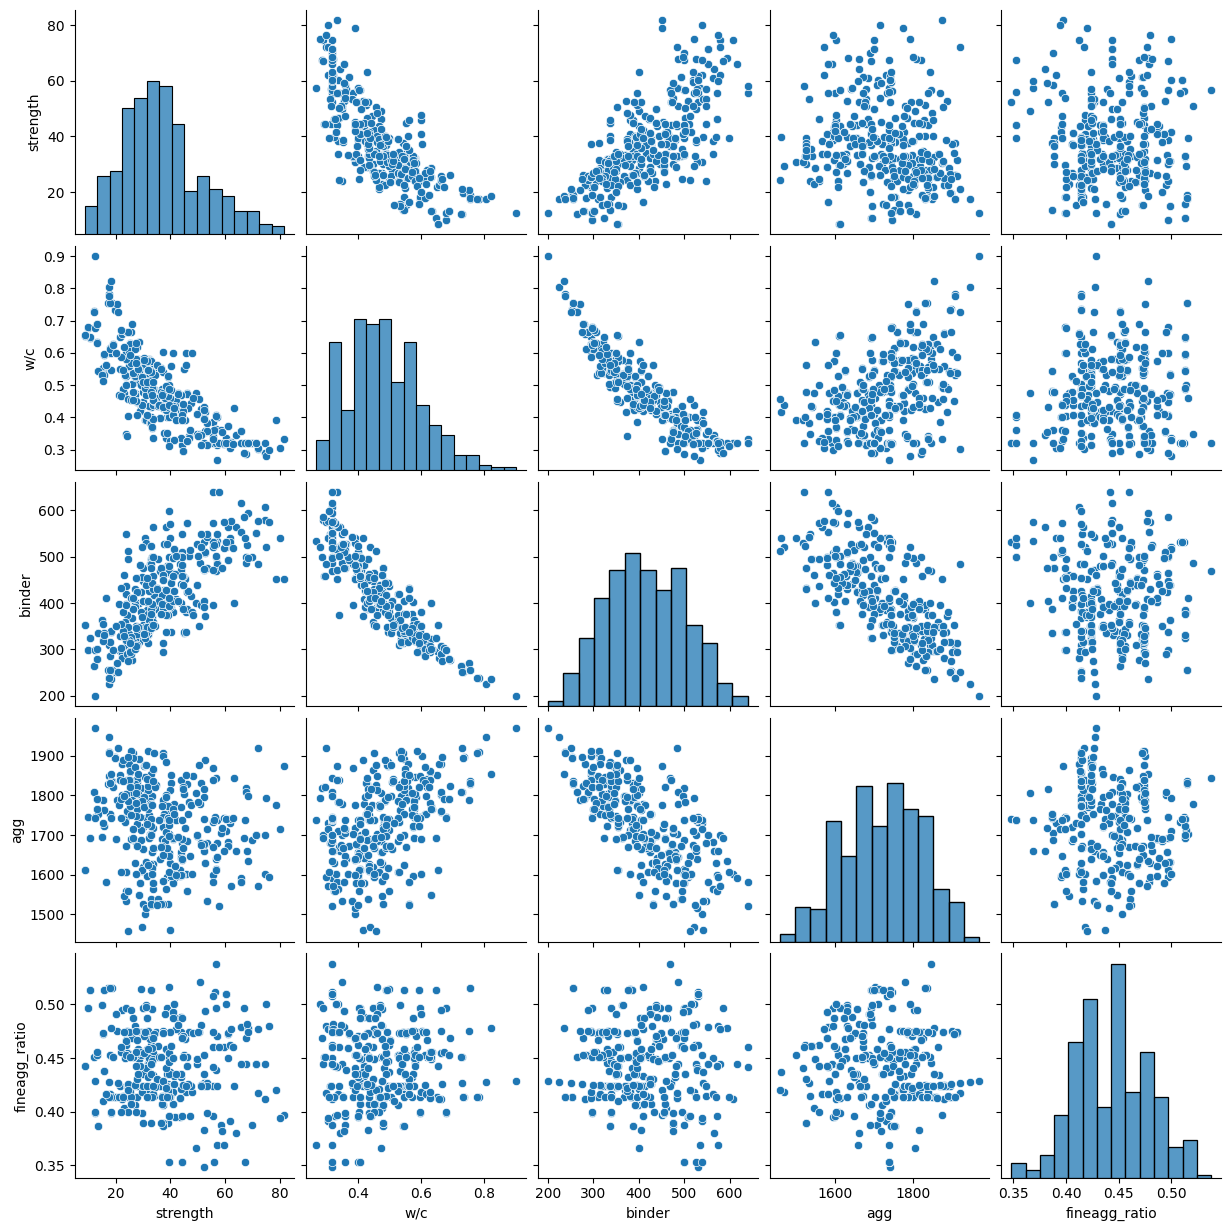

In [20]:
sns.pairplot(data=df_filtered_28_wo_age)

## Checking the distribution of the dosages of supplementary cementitious materials

In [21]:
df_28 = df[df["age"] == 28]

In [22]:
scm_means = [df_28[i].mean() for i in ["cement", "slag", "ash"]]

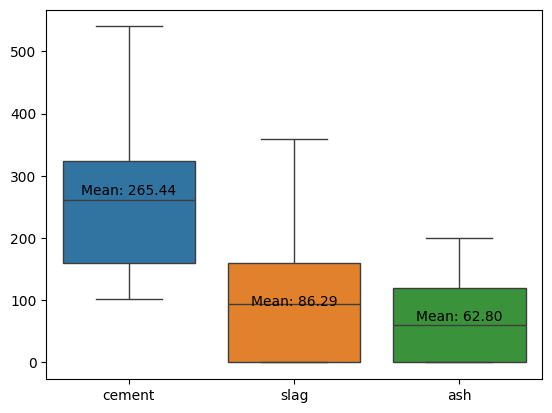

In [23]:
sns.boxplot(data=df_28[["cement", "slag", "ash"]])

for i, mean in enumerate(scm_means):
    plt.text(i, mean, f'Mean: {mean:.2f}', horizontalalignment='center', verticalalignment='bottom')

## Preparing dataframe to predictive model

In [24]:
df_28

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,binder,w/c,agg,fineagg_ratio,coarseagg_ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.576,1720.3,0.435,0.565
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,345.7,0.558,1818.1,0.474,0.526
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600,1602.0,0.418,0.582
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.598,1744.1,0.399,0.601
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65,296.0,0.649,1850.0,0.414,0.586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,140.0,133.0,103.0,200.0,7.0,916.0,753.0,28,36.44,376.0,0.551,1669.0,0.451,0.549
1018,147.0,115.0,89.0,202.0,9.0,860.0,829.0,28,19.99,351.0,0.601,1689.0,0.491,0.509
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20,278.4,0.689,1791.0,0.453,0.547
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,301.0,0.631,1766.0,0.456,0.544


In [61]:
df_28_pm = df_28.drop(columns=["water", "superplastic", "coarseagg", "fineagg", "age", "binder", "agg", "coarseagg_ratio"])
df_28_pm

,cement,slag,ash,strength,w/c,fineagg_ratio
0,141.3,212.0,0.0,29.89,0.576,0.435
2,250.0,0.0,95.7,29.22,0.558,0.474
3,266.0,114.0,0.0,45.85,0.600,0.418
4,154.8,183.4,0.0,18.29,0.598,0.399
8,296.0,0.0,0.0,21.65,0.649,0.414
...,...,...,...,...,...,...
1016,140.0,133.0,103.0,36.44,0.551,0.451
1018,147.0,115.0,89.0,19.99,0.601,0.491
1022,144.8,0.0,133.6,13.20,0.689,0.453
1025,135.0,0.0,166.0,13.29,0.631,0.456


# Starting training predictive model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [63]:
X = df_28_pm.drop("strength", axis=1)
y = df_28_pm['strength']

In [64]:
feature_train, feature_test, target_train, target_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [65]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)
y_model = model.predict(X)

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.78068443, 0.82845436, 0.82842746, 0.85270807, 0.86606032])

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

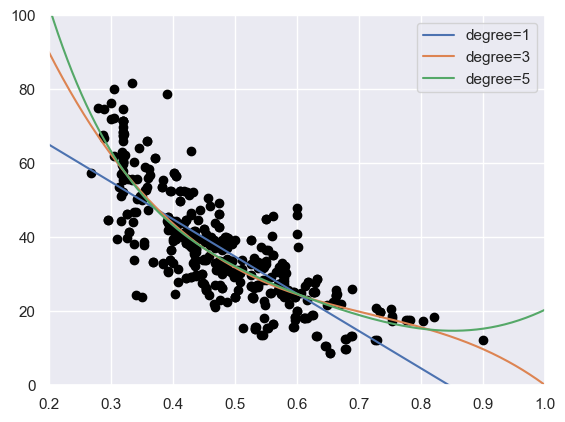

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(0.2, 1.0, 425)[:, None]
X_simple = X["w/c"].values.reshape(-1, 1)


plt.scatter(X_simple, y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X_simple, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree={0}'.format(degree))
plt.xlim(0.2, 1)
plt.ylim(0, 100)
plt.legend(loc='best');